# Lab 3 - Working with 'real' data

## William Olsen, partners with Jennifer Vo

In this lab we are going to work on how to estimate the background from 'real' data. Real is in air quotes because the data is actually from simplified simulations to make the problems manageable in a single lab. But the data will have some features that resemble that of real data sets.

In [85]:
# general imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

# this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

## Problem 1

Lets consider data from a gamma-ray satellite orbiting in low Earth orbit. This satellite records the number of particles detected every 100 milliseconds, with an orbit of approximately 90 minutes. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

### Part 1

First we will download and explore the data set.  The data has 25 million rows and 4 columns.  The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts.

Lets begin by plotting our data to gain a better understanding of its dynamics.  Once we have done this we will provide a high-level description of the features seen in the data.  Finally we will consider how we could construct a background pdf provided possible signal contaimination. 

In [86]:
# first lets load our data
hf = h5py.File('gammaray_lab4.h5', 'r')
data = np.array(hf.get('data'))

In [87]:
# lets split the data further into a time array and eveyrthing else
times = data[0,:]
metadata = data[1:,:]

In [88]:
# lets define variable names for our columns
solar_phase_idx = 0
earth_long_idx = 1
num_particles_idx = 2

# lets define a helper function to return us a subset of the data
def get_subset(x, y, column, start, amount):
    return x[start:min(start+amount, len(x))], y[column, start:min(start+amount, len(y[column]))]

# lets define a helper function for quick plotting
def generate_scatter_plot(x, y, ylabel):
    plt.plot(x, y, 'o-')
    plt.tick_params(labelsize=24)
    plt.xlabel('Time (GPS seconds)', fontsize=24)
    plt.ylabel(ylabel, fontsize=24)

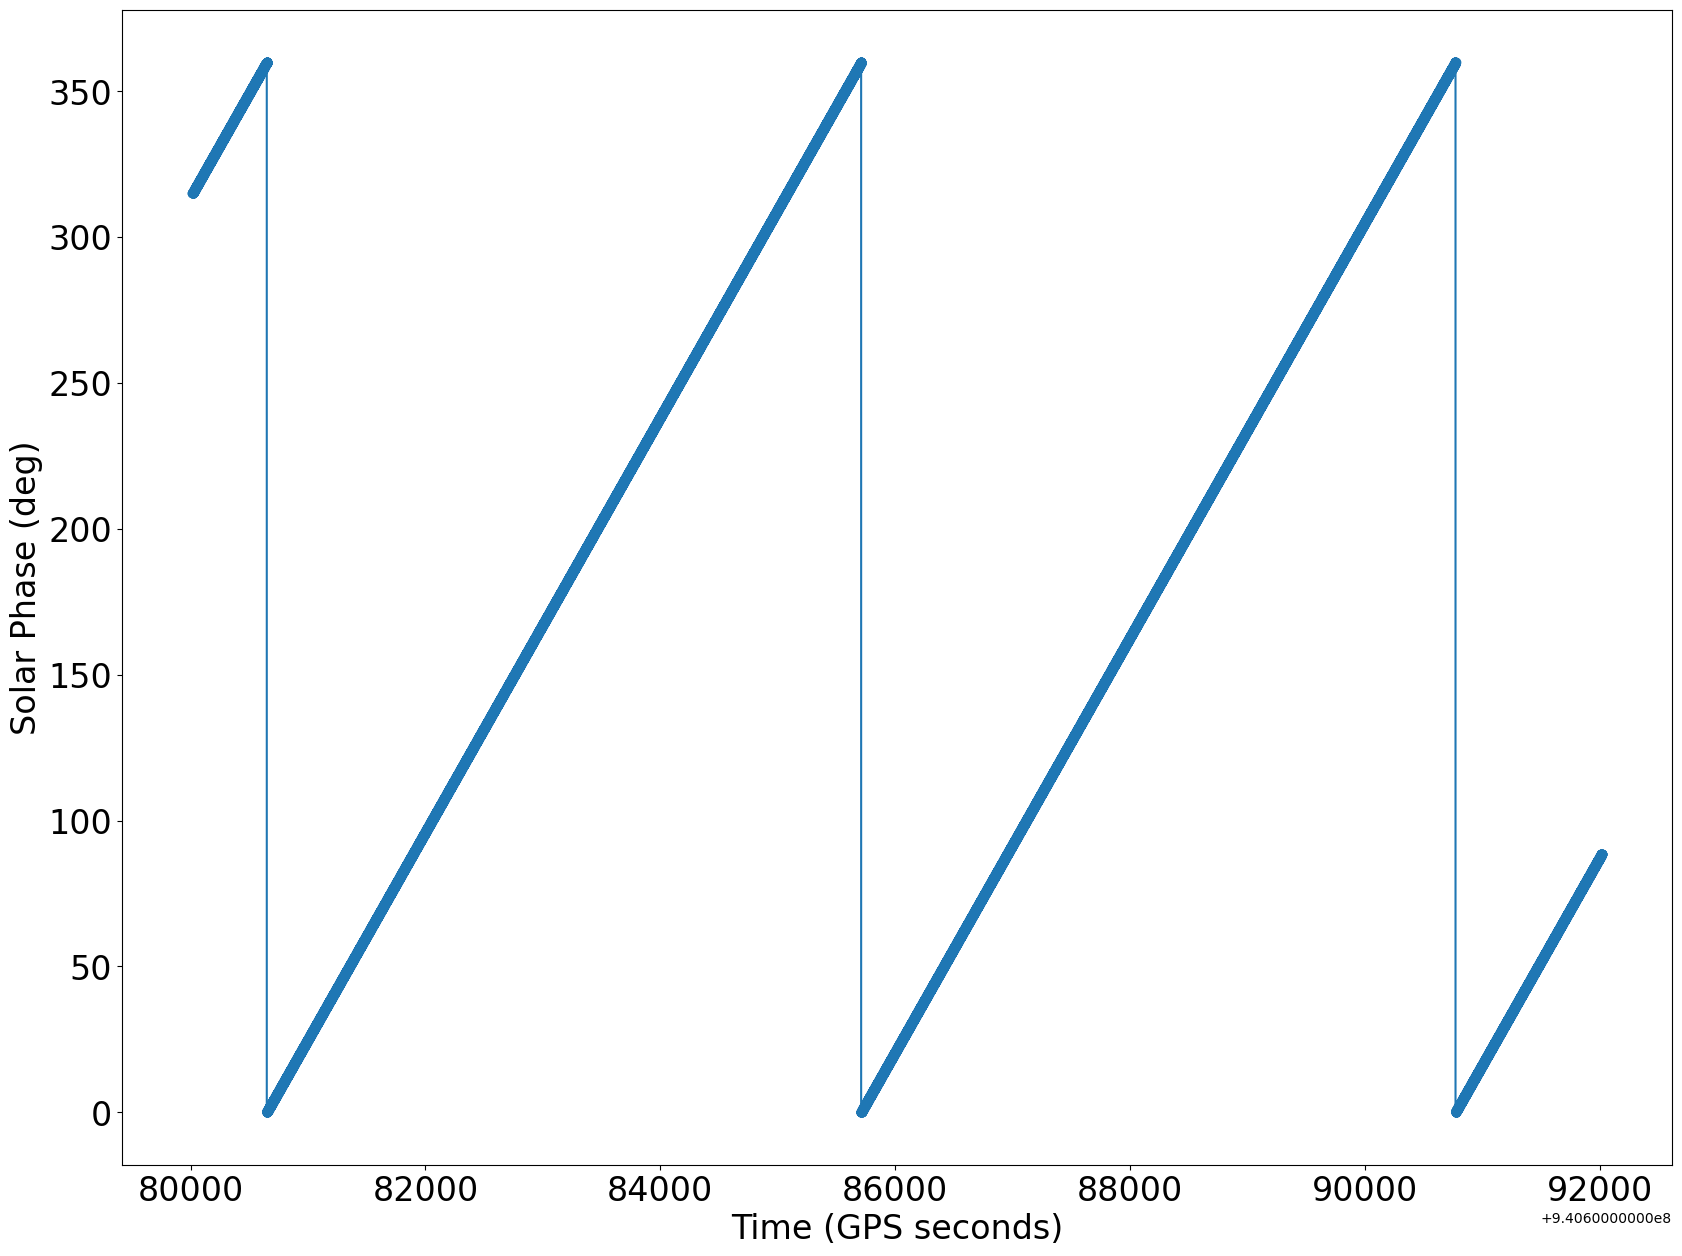

In [89]:
times_sp_1, solar_phase_1 = get_subset(times, metadata, solar_phase_idx, 0, 120000)

generate_scatter_plot(times_sp_1, solar_phase_1, 'Solar Phase (deg)')

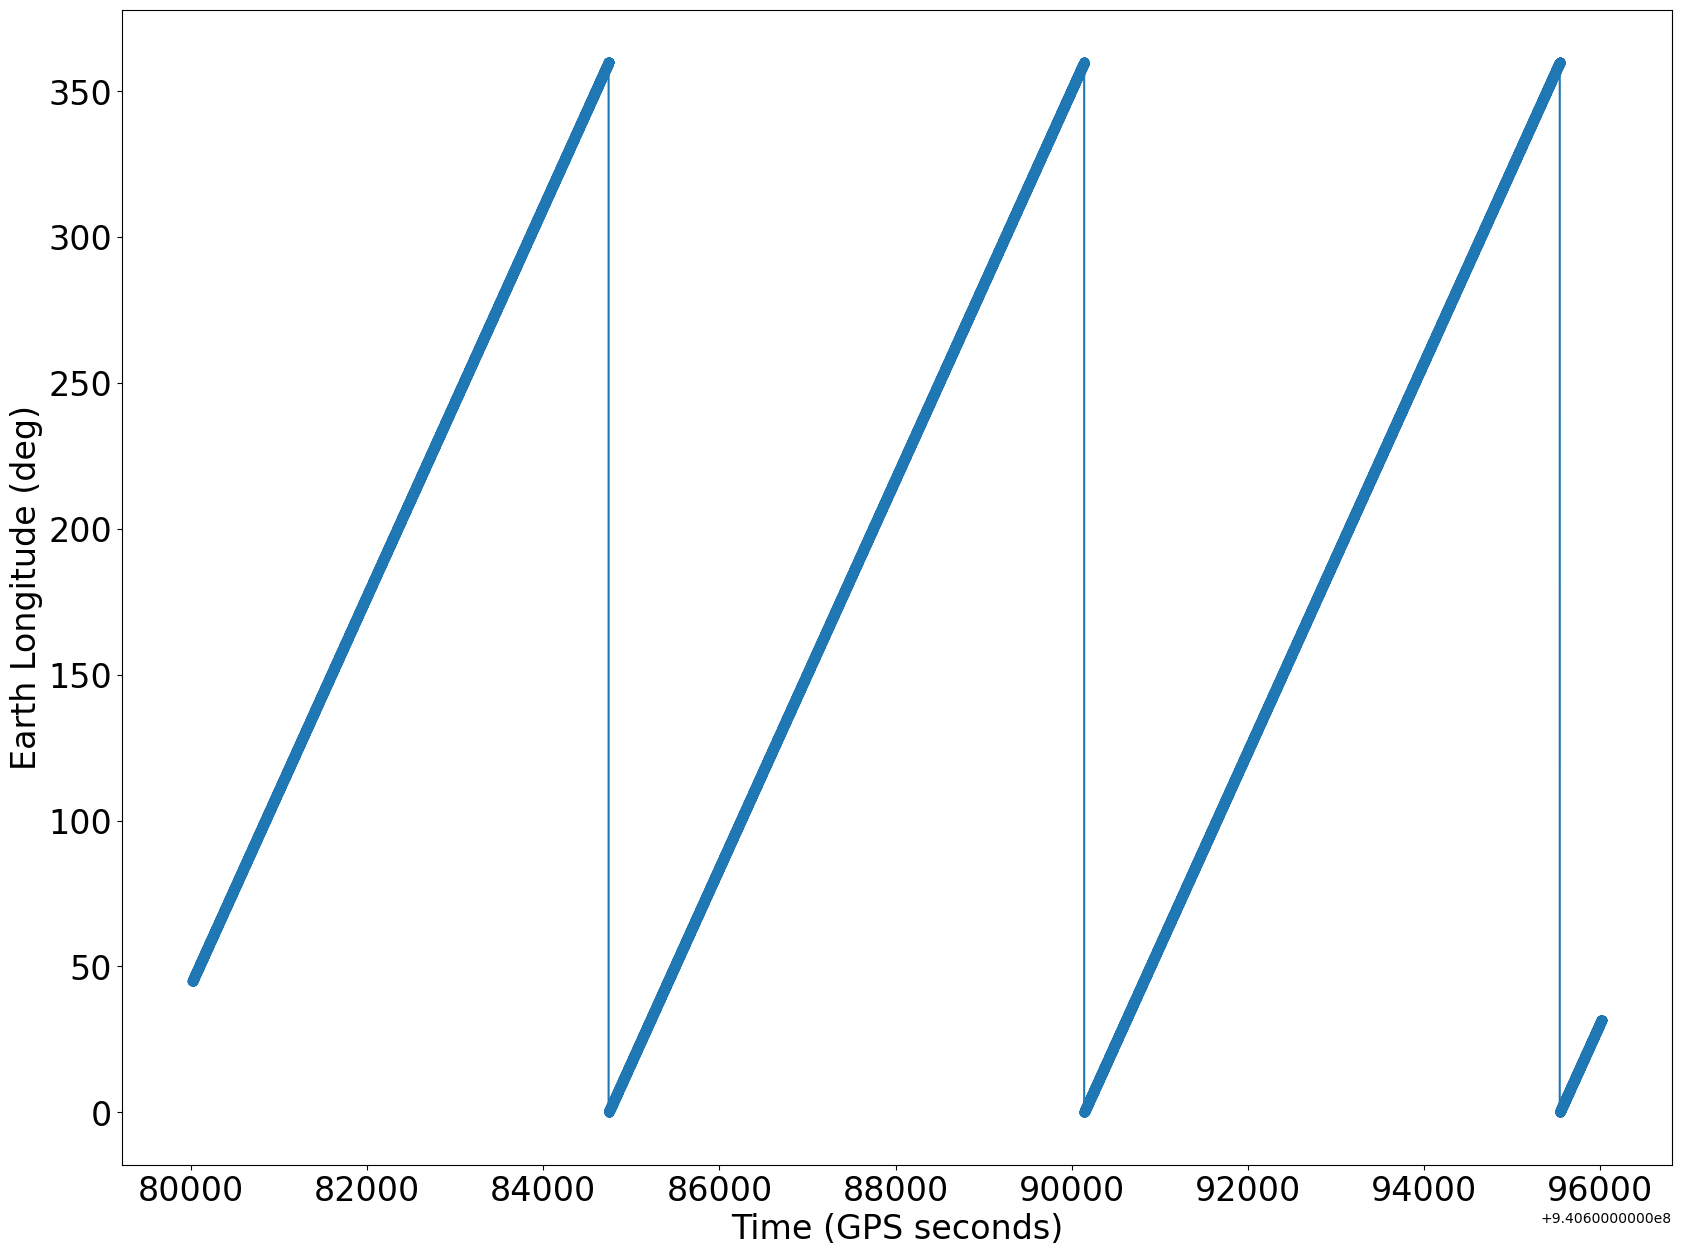

In [90]:
times_el_1, earth_long_1 = get_subset(times, metadata, earth_long_idx, 0, 160000)

generate_scatter_plot(times_el_1, earth_long_1, 'Earth Longitude (deg)')

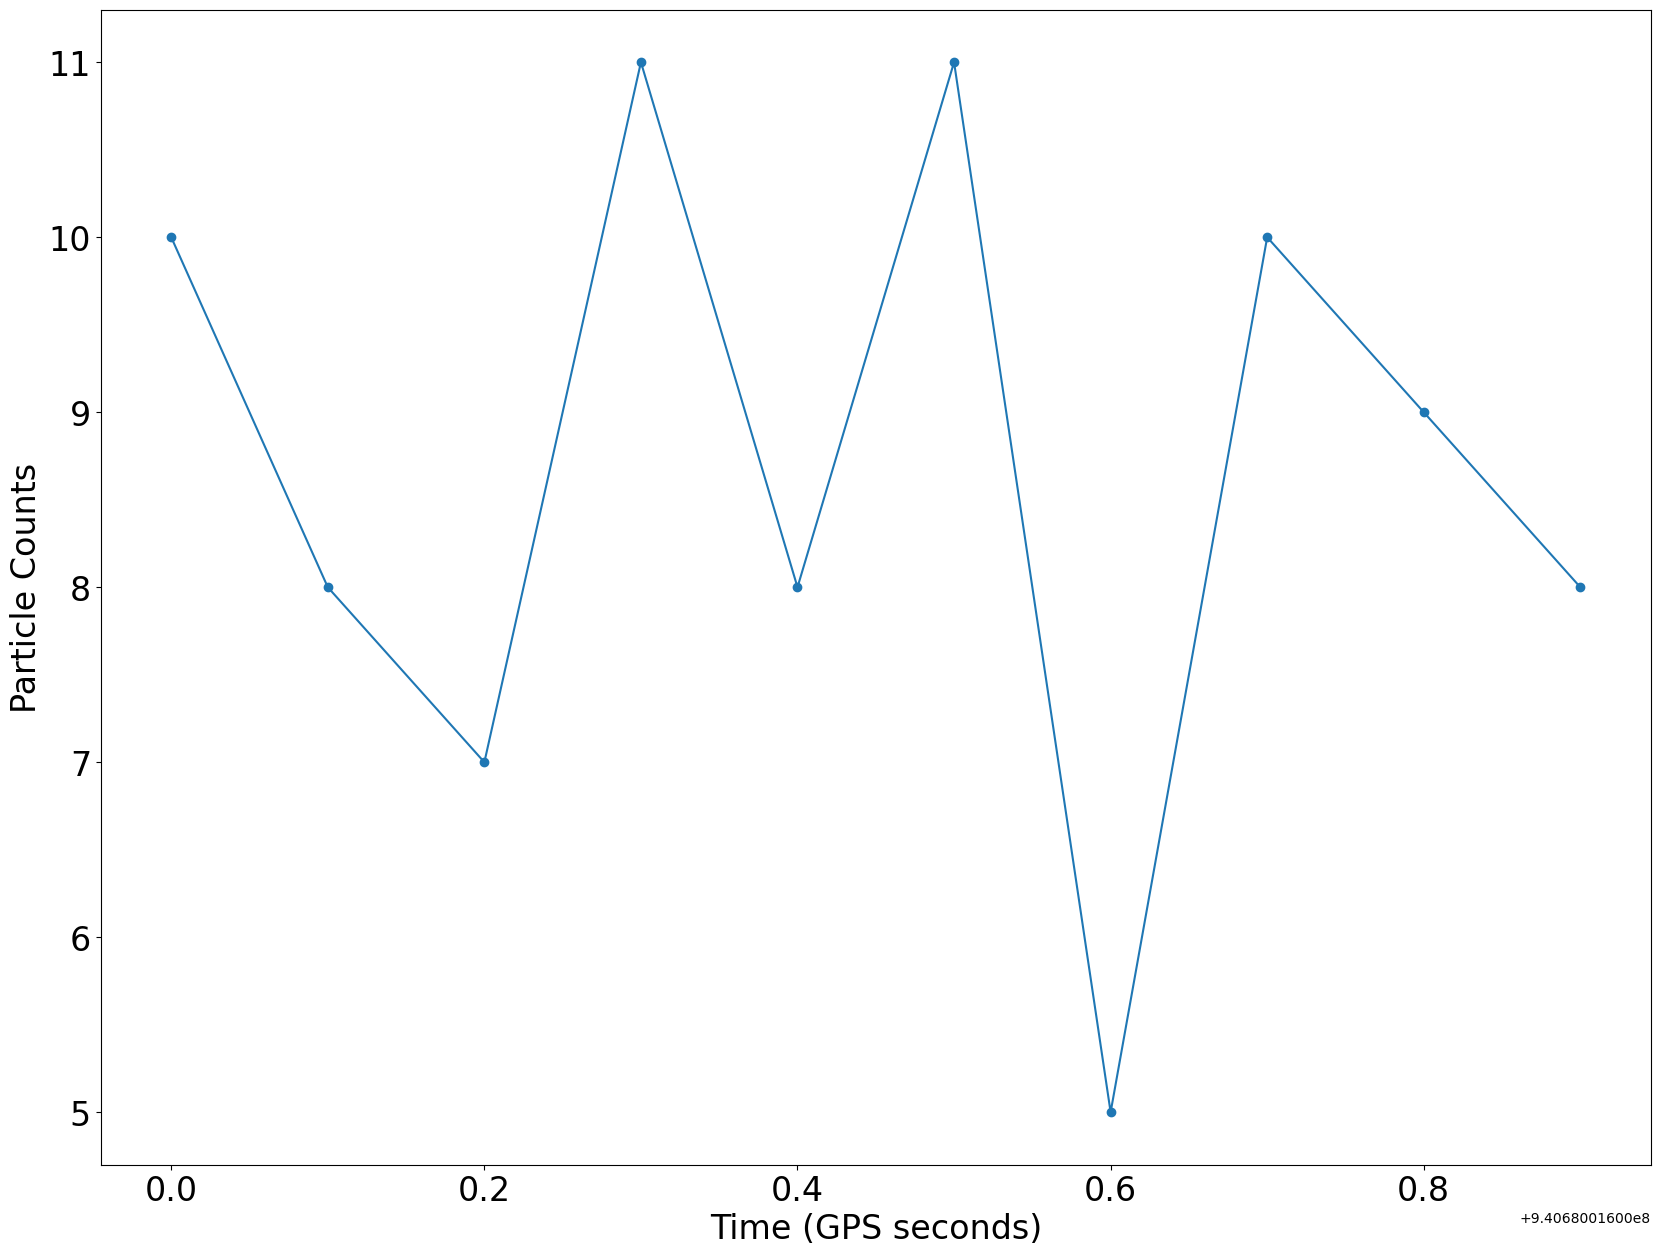

In [91]:
times_pc_1, particle_counts_1 = get_subset(times, metadata, num_particles_idx, 0, 10)

generate_scatter_plot(times_pc_1, particle_counts_1, 'Particle Counts')

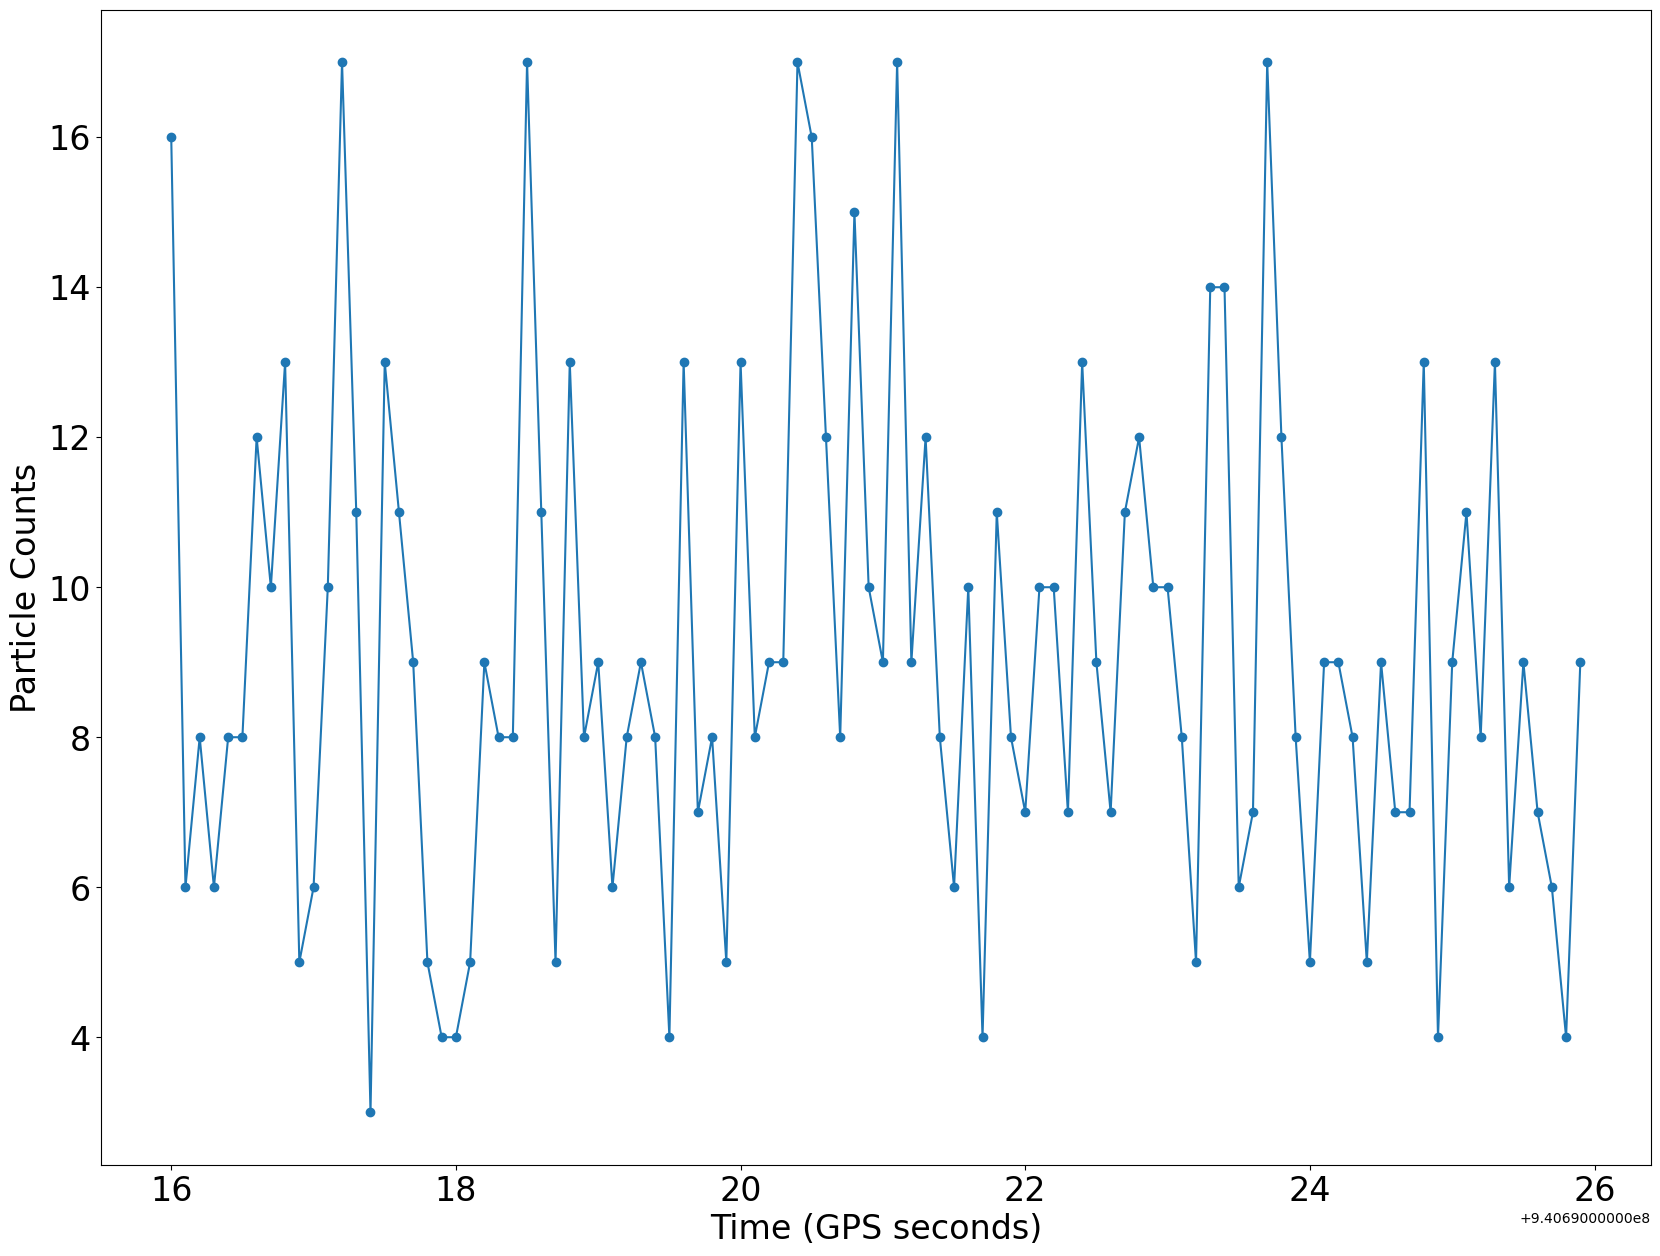

In [92]:
times_pc_2, particle_counts_2 = get_subset(times, metadata, num_particles_idx, 100000, 100)

generate_scatter_plot(times_pc_2, particle_counts_2, 'Particle Counts')

Lets look at the particle counts when we fold the time over a period of the orbit which is 90 minutes or $90*60=5400$ GPS seconds by plotting our results on a 2D histogram.

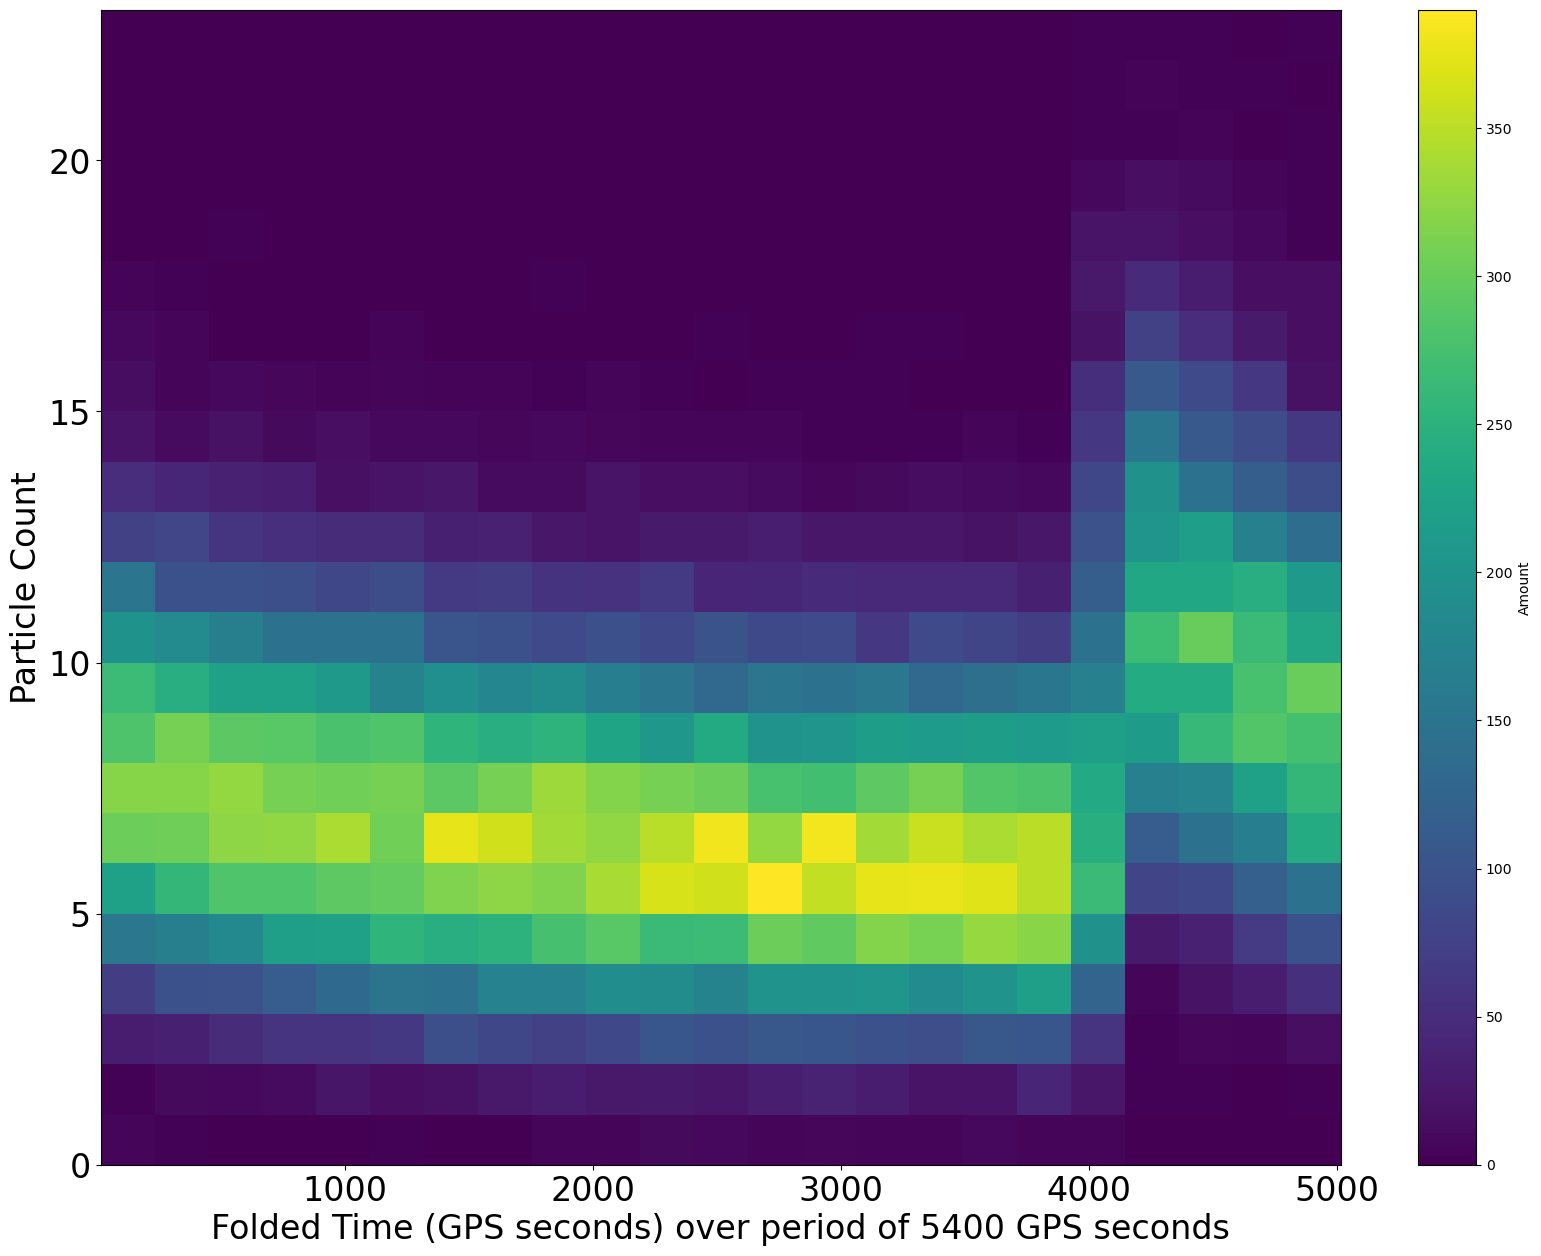

In [93]:
orbit_period = 90*60
times_folded = times % orbit_period

times_folded_pc_3, particle_counts_3 = get_subset(times_folded, metadata, num_particles_idx, 0, 50000)

fig, ax = plt.subplots(1, 1)

hh = ax.hist2d(times_folded_pc_3, particle_counts_3, bins=23)
plt.tick_params(labelsize=24)
plt.ylim(0, 23)
plt.xlabel('Folded Time (GPS seconds) over period of 5400 GPS seconds', fontsize=24)
plt.ylabel('Particle Count', fontsize=24)

fig.colorbar(hh[3], ax=ax, label='Amount')

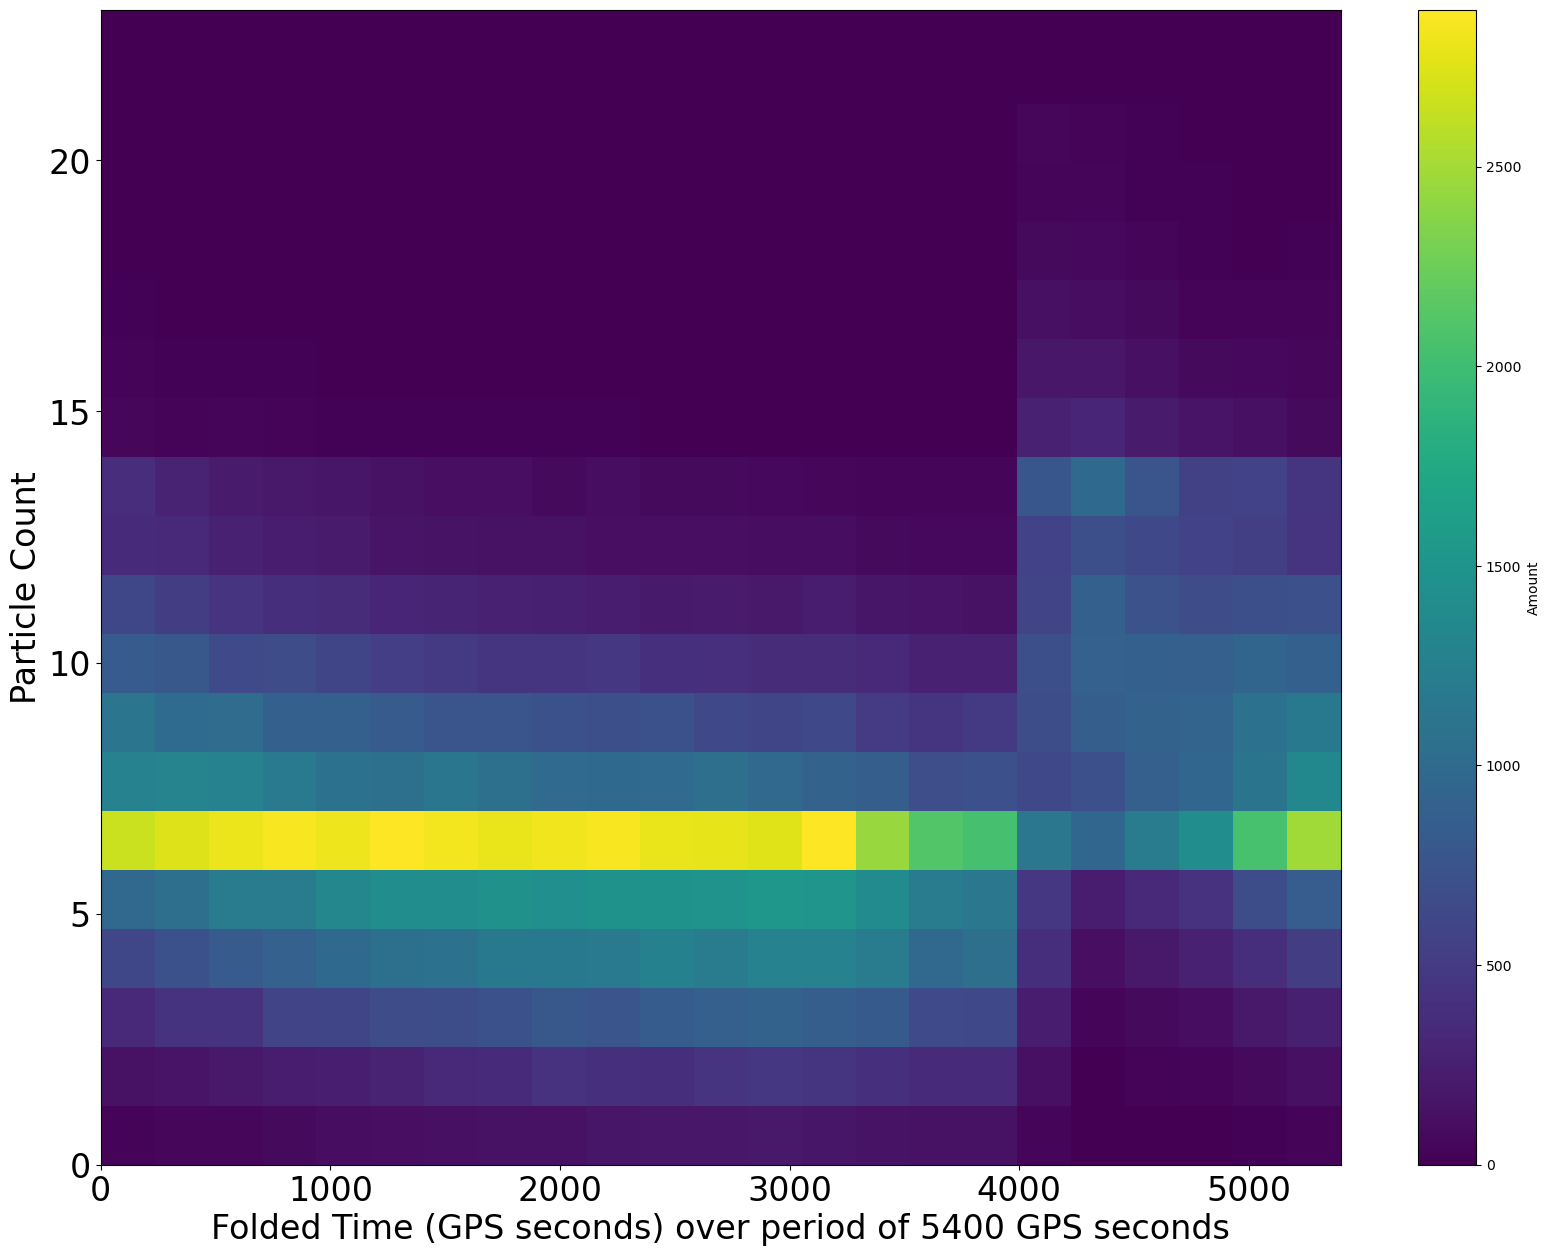

In [94]:
times_folded_pc_4, particle_counts_4 = get_subset(times_folded, metadata, num_particles_idx, 50000, 200000)

fig, ax = plt.subplots(1, 1)

hh = ax.hist2d(times_folded_pc_4, particle_counts_4, bins=23)
plt.tick_params(labelsize=24)
plt.ylim(0, 23)
plt.xlabel('Folded Time (GPS seconds) over period of 5400 GPS seconds', fontsize=24)
plt.ylabel('Particle Count', fontsize=24)

fig.colorbar(hh[3], ax=ax, label='Amount')

From the above plots we can draw many initial conclusions - lets begin with the most obvious ones.  In our first tweo plots we see that the Solar Phase and the Earth Longitude increase linearly with time then reset back to 0.  This reset is due to both of these values being 'cyclic' and the linear increase is due to the satallite orbiting at - approximately - a constant speed.

Next we will observe the plots regarding the number of particles counted during each 100 millisecond GPS period.  From the first graph of 10 values we see that there is a fluctuation between around 11 particles at a maximum and 5 at a minimum.  Looking at more values we see that the possible range of counts expands slightly from 17 at a maximum to 4 at a minimum but in general we have between 8-10 particles detected during the observation period.  The next thing we were interested in viewing was looking at a longer period of time and seeing how the number of particles behaved through that longer period.  Plotting this information on a scatter plot turned to be of no use due to consistent overlap thus we folded the data using the period of orbit (90 GPS minutes or 5400 GPS seconds) and then plotted on a 2D Histogram.  Two of these plots can be seen above.  In the first plot we see that over the period of orbit we begin with a centeralized amount of particles seen which decreases minimally as the satallite continues through it's orbit.  However near the end of its orbit, there is a spike in the number of particles detected.  This behavior is quite curious.

To explore this 'spike' further we moved to plot more data over the orbital period and we found that the spike was not eliminated however we do see that as we consider more data we do indeed have a mean reading of around 6 or 7 particles being detected during a GPS second. 

Lets explore the values of our other two data values - the Solar Phase and the Earth Longitude - on this folded orbital time scale.

In [95]:
hf.close()